In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yjgywqnXFwo1dkBn6E8c")
project = rf.workspace("titaniumsv5").project("chandrayaan-2-ohrc-lunar-crater-dataset")
version = project.version(4)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...


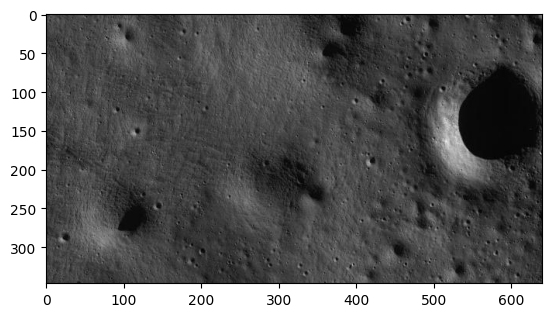

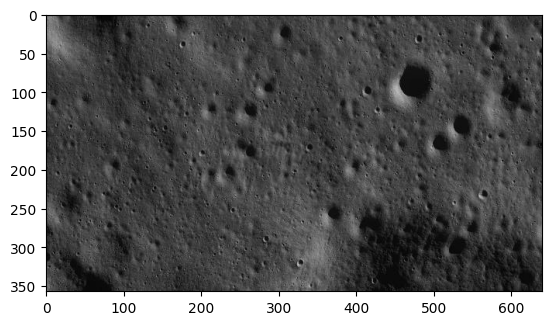

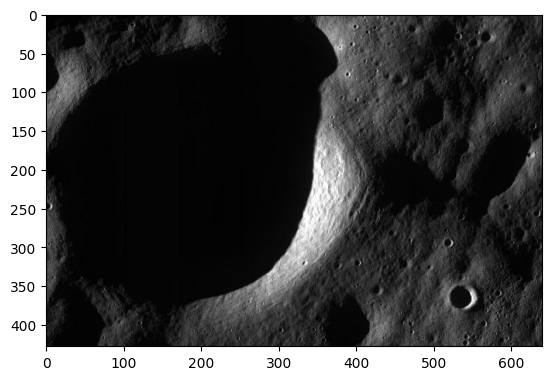

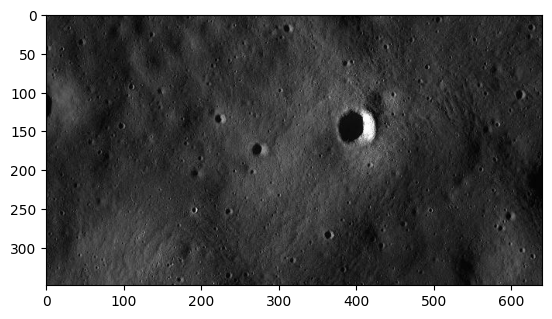

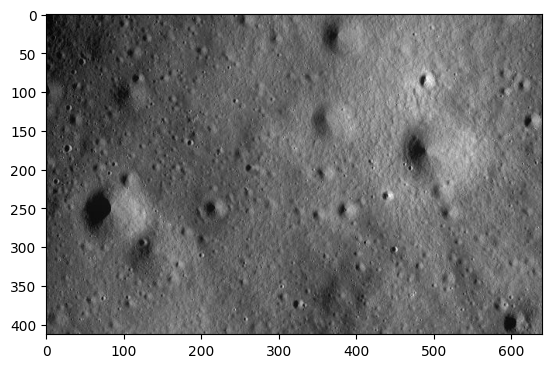

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dataset_path = Path(dataset.location)
image_folder = dataset_path / "train" / "images"

image_files = list(image_folder.glob("*.jpg"))

for i in range(5):
  img = mpimg.imread(image_files[i])
  plt.imshow(img)
  plt.show()


In [ ]:
dataset_path = Path(dataset.location)
label_folder = dataset_path / "train" / "labels"

label_files = list(label_folder.glob("*.txt"))

print(label_files[0].read_text())

0 0.646875 0.27020202020202033 0.6 0.27020202020202033 0.6 0.34090909090909105 0.646875 0.34090909090909105
0 0.5828125 0.6161616161616164 0.53125 0.6161616161616164 0.53125 0.6994949494949495 0.5828125 0.6994949494949495
0 0.6984375 0.6540404040404041 0.66875 0.6540404040404041 0.66875 0.6994949494949495 0.6984375 0.6994949494949495
0 0.853125 0.714646464646465 0.8296875 0.714646464646465 0.8296875 0.7626262626262629 0.853125 0.7626262626262629
0 0.578125 0.76010101010101 0.5328125 0.76010101010101 0.5328125 0.8308080808080808 0.578125 0.8308080808080808
0 0.25 0.49747474747474746 0.215625 0.49747474747474746 0.215625 0.547979797979798 0.25 0.547979797979798
0 0.653125 0.015151515151515279 0.6296875 0.015151515151515277 0.6296875 0.05303030303030316 0.653125 0.05303030303030316
0 0.890625 0.28030303030303044 0.8734375 0.28030303030303044 0.8734375 0.3156565656565658 0.890625 0.3156565656565658
0 0.9203125 0.24494949494949514 0.9015625 0.24494949494949508 0.9015625 0.27777777777777796 

In [ ]:
import os
image_files = sorted(os.listdir(image_folder))
label_files = sorted(os.listdir(image_folder))
print(image_files[0])
print(label_files[0])

100_jpg.rf.efb4b46e3134cbceabf12a6d540b3cbd.jpg
100_jpg.rf.efb4b46e3134cbceabf12a6d540b3cbd.jpg


In [ ]:
print(image_files)
print(label_files)

['100_jpg.rf.efb4b46e3134cbceabf12a6d540b3cbd.jpg', '13_jpg.rf.5178f1551e33147e180781feccdae03d.jpg', '14_jpg.rf.eaf17bb886ffc80b08fed4d707d964a0.jpg', '17_jpg.rf.8651f0005258921c54c3a6b340997f0a.jpg', '18_jpg.rf.b1638a0575d9659ee7178296c94e0e30.jpg', '19_jpg.rf.e62ff00b8f0c28fd8ff53c069c771533.jpg', '22_jpg.rf.1246bcbdd119fb7b25fa38299d9cffa9.jpg', '26_jpg.rf.a22530876a6bb305c53d8bf9c673d0e5.jpg', '28_jpg.rf.d57cc98e89aff46058005ecee29805b0.jpg', '2_jpg.rf.0ffdaf7fc98b8a0a16a3f00c88bb7faa.jpg', '30_jpg.rf.89e64da231c072c64732ce23da385601.jpg', '32_jpg.rf.417e319fee8bb08953a034d8ae4fbbb4.jpg', '34_jpg.rf.3443991c0bbb88ccb01dd9e55ac36f3e.jpg', '35_jpg.rf.af83d086b1033690ce1b59e97844e026.jpg', '38_jpg.rf.2d3032992a10ba240793a1eb4944c11c.jpg', '40_jpg.rf.e1e9ec92b143bd7d3b91bf3eb50b1f5e.jpg', '43_jpg.rf.22d3f9db3ef4ffad12b6428e1c87754d.jpg', '45_jpg.rf.addead155ea934bef18ea52cacf65ff9.jpg', '49_jpg.rf.5d0b54b899873c0823e533aefe940d84.jpg', '50_jpg.rf.0bb950f5b99e6b732b4565184dceb66f.jpg',

Image file path: /content/Chandrayaan-2-OHRC-Lunar-Crater-Dataset-4/train/images/2_jpg.rf.0ffdaf7fc98b8a0a16a3f00c88bb7faa.jpg
Label file path: /content/Chandrayaan-2-OHRC-Lunar-Crater-Dataset-4/train/labels/5_jpg.rf.8498e33b0e122225503153d2ce588016.txt


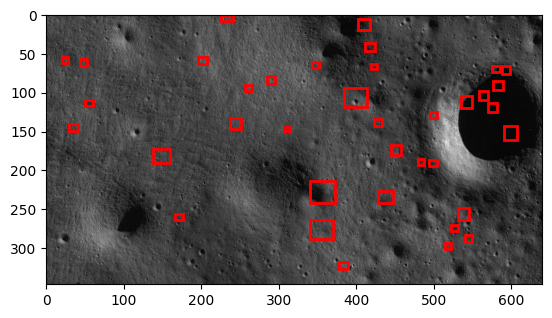

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Polygon
import numpy as np

dataset_path = Path(dataset.location)
image_folder = dataset_path / "train" / "images"
label_folder = dataset_path / "train" / "labels"

image_files = list(image_folder.glob("*.jpg"))
label_files = list(label_folder.glob("*.txt"))

print("Image file path:", image_files[0].absolute())
print("Label file path:", label_files[0].absolute())

img = mpimg.imread(image_files[0].absolute())
label_data = label_files[0].read_text().strip().splitlines()

fig, ax = plt.subplots(1)
ax.imshow(img)

image_height, image_width = img.shape[:2]

for line in label_data:
    values = line.split()

    if len(values) >= 9:
        class_id = int(values[0])
        x1, y1, x2, y2, x3, y3, x4, y4 = map(float, values[1:])

        x1, y1 = x1 * image_width, y1 * image_height
        x2, y2 = x2 * image_width, y2 * image_height
        x3, y3 = x3 * image_width, y3 * image_height
        x4, y4 = x4 * image_width, y4 * image_height

        polygon = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])

        patch = Polygon(polygon, closed=True, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(patch)

ax.set_xlim([0, image_width])
ax.set_ylim([image_height, 0])

plt.show()


First image file path: /content/Chandrayaan-2-OHRC-Lunar-Crater-Dataset-4/train/images/100_jpg.rf.efb4b46e3134cbceabf12a6d540b3cbd.jpg
First label file path: /content/Chandrayaan-2-OHRC-Lunar-Crater-Dataset-4/train/labels/100_jpg.rf.efb4b46e3134cbceabf12a6d540b3cbd.txt


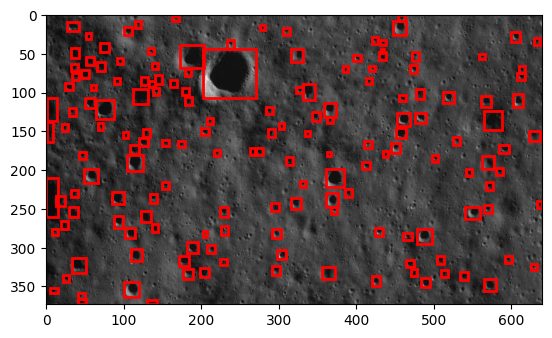

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Polygon
import numpy as np

dataset_path = Path(dataset.location)
image_folder = dataset_path / "train" / "images"
label_folder = dataset_path / "train" / "labels"

image_files = sorted(image_folder.glob("*.jpg"))
label_files = sorted(label_folder.glob("*.txt"))

print("First image file path:", image_files[0].absolute())
print("First label file path:", label_files[0].absolute())

img = mpimg.imread(image_files[0].absolute())
label_data = label_files[0].read_text().strip().splitlines()

fig, ax = plt.subplots(1)
ax.imshow(img)

image_height, image_width = img.shape[:2]

for line in label_data:

    values = line.split()

    if len(values) >= 9:
        class_id = int(values[0])
        x1, y1, x2, y2, x3, y3, x4, y4 = map(float, values[1:])

        x1, y1 = x1 * image_width, y1 * image_height
        x2, y2 = x2 * image_width, y2 * image_height
        x3, y3 = x3 * image_width, y3 * image_height
        x4, y4 = x4 * image_width, y4 * image_height

        polygon = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])

        patch = Polygon(polygon, closed=True, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(patch)

ax.set_xlim([0, image_width])
ax.set_ylim([image_height, 0])

plt.show()


In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Polygon
import numpy as np

dataset_path = Path(dataset.location)
image_folder = dataset_path / "train" / "images"
label_folder = dataset_path / "train" / "labels"

image_files = sorted(image_folder.glob("*.jpg"))
label_files = sorted(label_folder.glob("*.txt"))

assert len(image_files) == len(label_files), "Number of images and labels must match."

for img_file, label_file in zip(image_files, label_files):

    img = mpimg.imread(img_file.absolute())
    label_data = label_file.read_text().strip().splitlines()

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    image_height, image_width = img.shape[:2]

    for line in label_data:

        values = line.split()

        if len(values) >= 9:
            class_id = int(values[0])
            x1, y1, x2, y2, x3, y3, x4, y4 = map(float, values[1:])

            x1, y1 = x1 * image_width, y1 * image_height
            x2, y2 = x2 * image_width, y2 * image_height
            x3, y3 = x3 * image_width, y3 * image_height
            x4, y4 = x4 * image_width, y4 * image_height

            polygon = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])

            patch = Polygon(polygon, closed=True, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(patch)

    ax.set_xlim([0, image_width])
    ax.set_ylim([image_height, 0])

    ax.set_title(f"Image: {img_file.name}")

    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd /content/drive/MyDrive/Crater_Detection

/content/drive/MyDrive/Crater_Detection


In [ ]:
!pip install pillow==9.5.0
!pip install albumentations==1.4

In [ ]:
%cd /content/drive/MyDrive/Crater_Detection

!yolo task=detect mode=train model=yolov8n.pt data= data.yaml epochs=75 imgsz=640 plots=True

/content/drive/MyDrive/Crater_Detection
Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

In [ ]:
!ls runs/detect/train/

args.yaml					     P_curve.png	 train_batch196.jpg
confusion_matrix_normalized.png			     PR_curve.png	 train_batch197.jpg
confusion_matrix.png				     R_curve.png	 train_batch1.jpg
events.out.tfevents.1727698312.54e657a9171e.14017.0  results.csv	 train_batch2.jpg
F1_curve.png					     results.png	 val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	 val_batch0_pred.jpg
labels.jpg					     train_batch195.jpg  weights


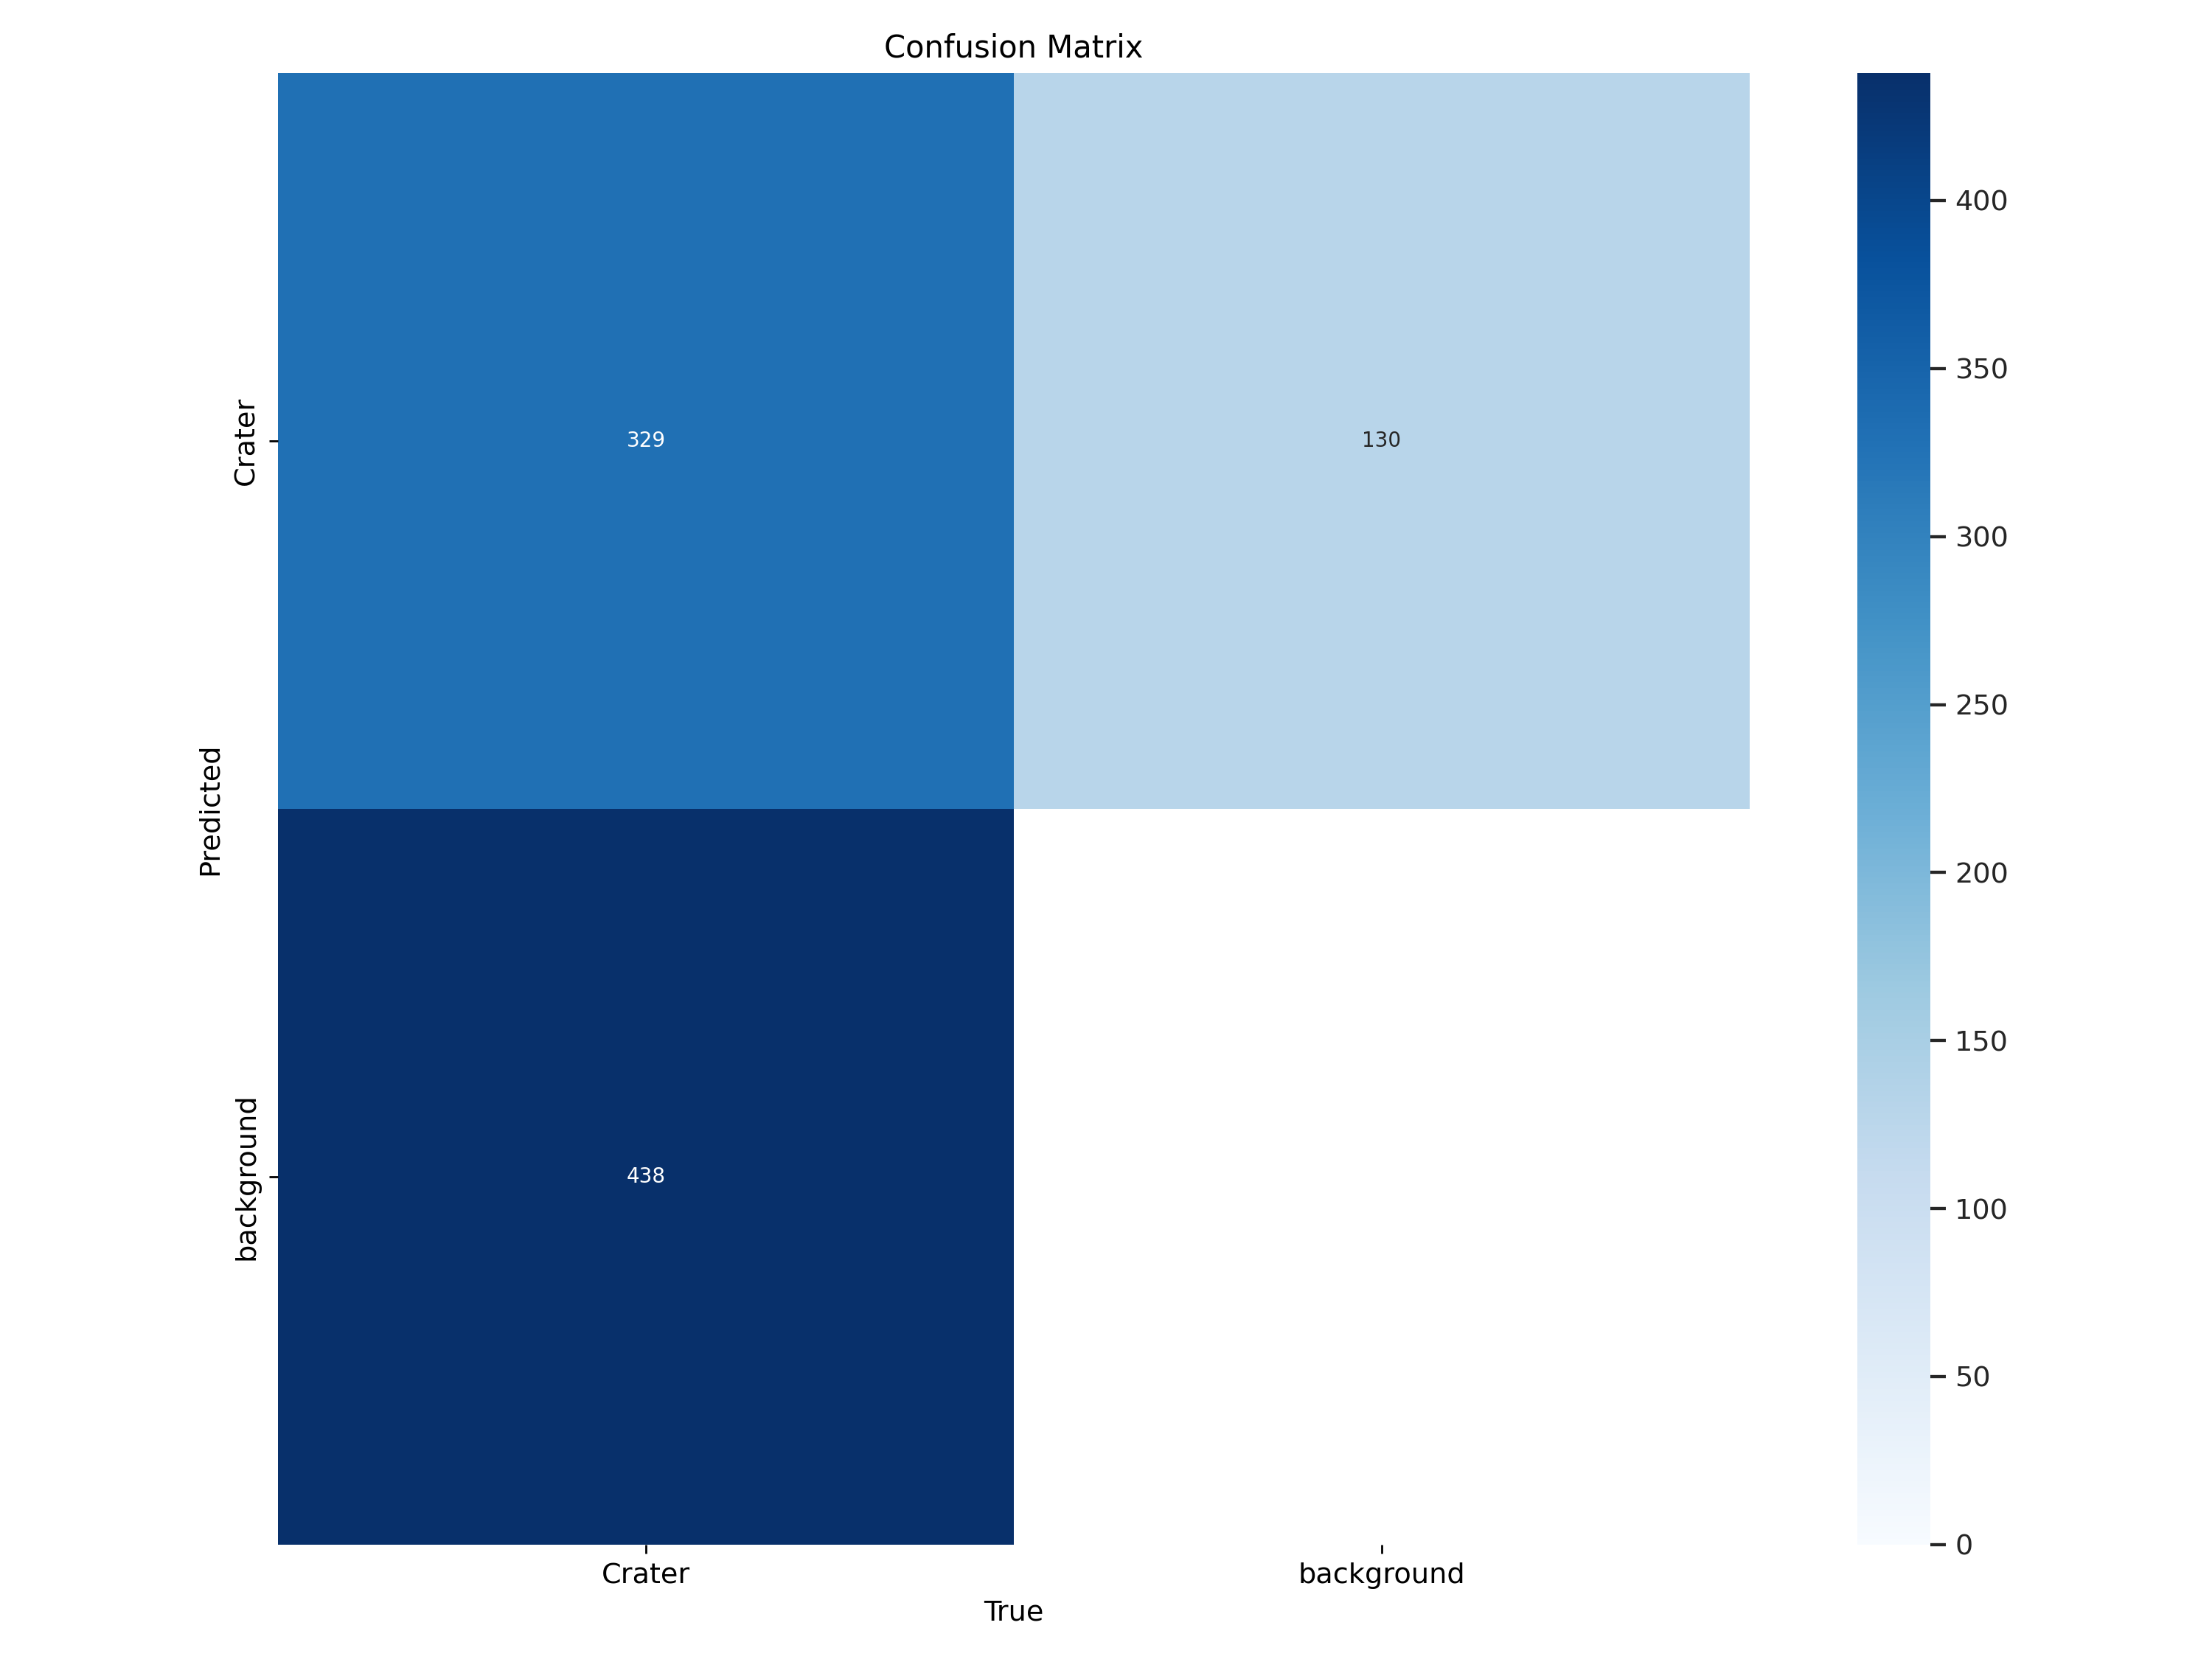

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

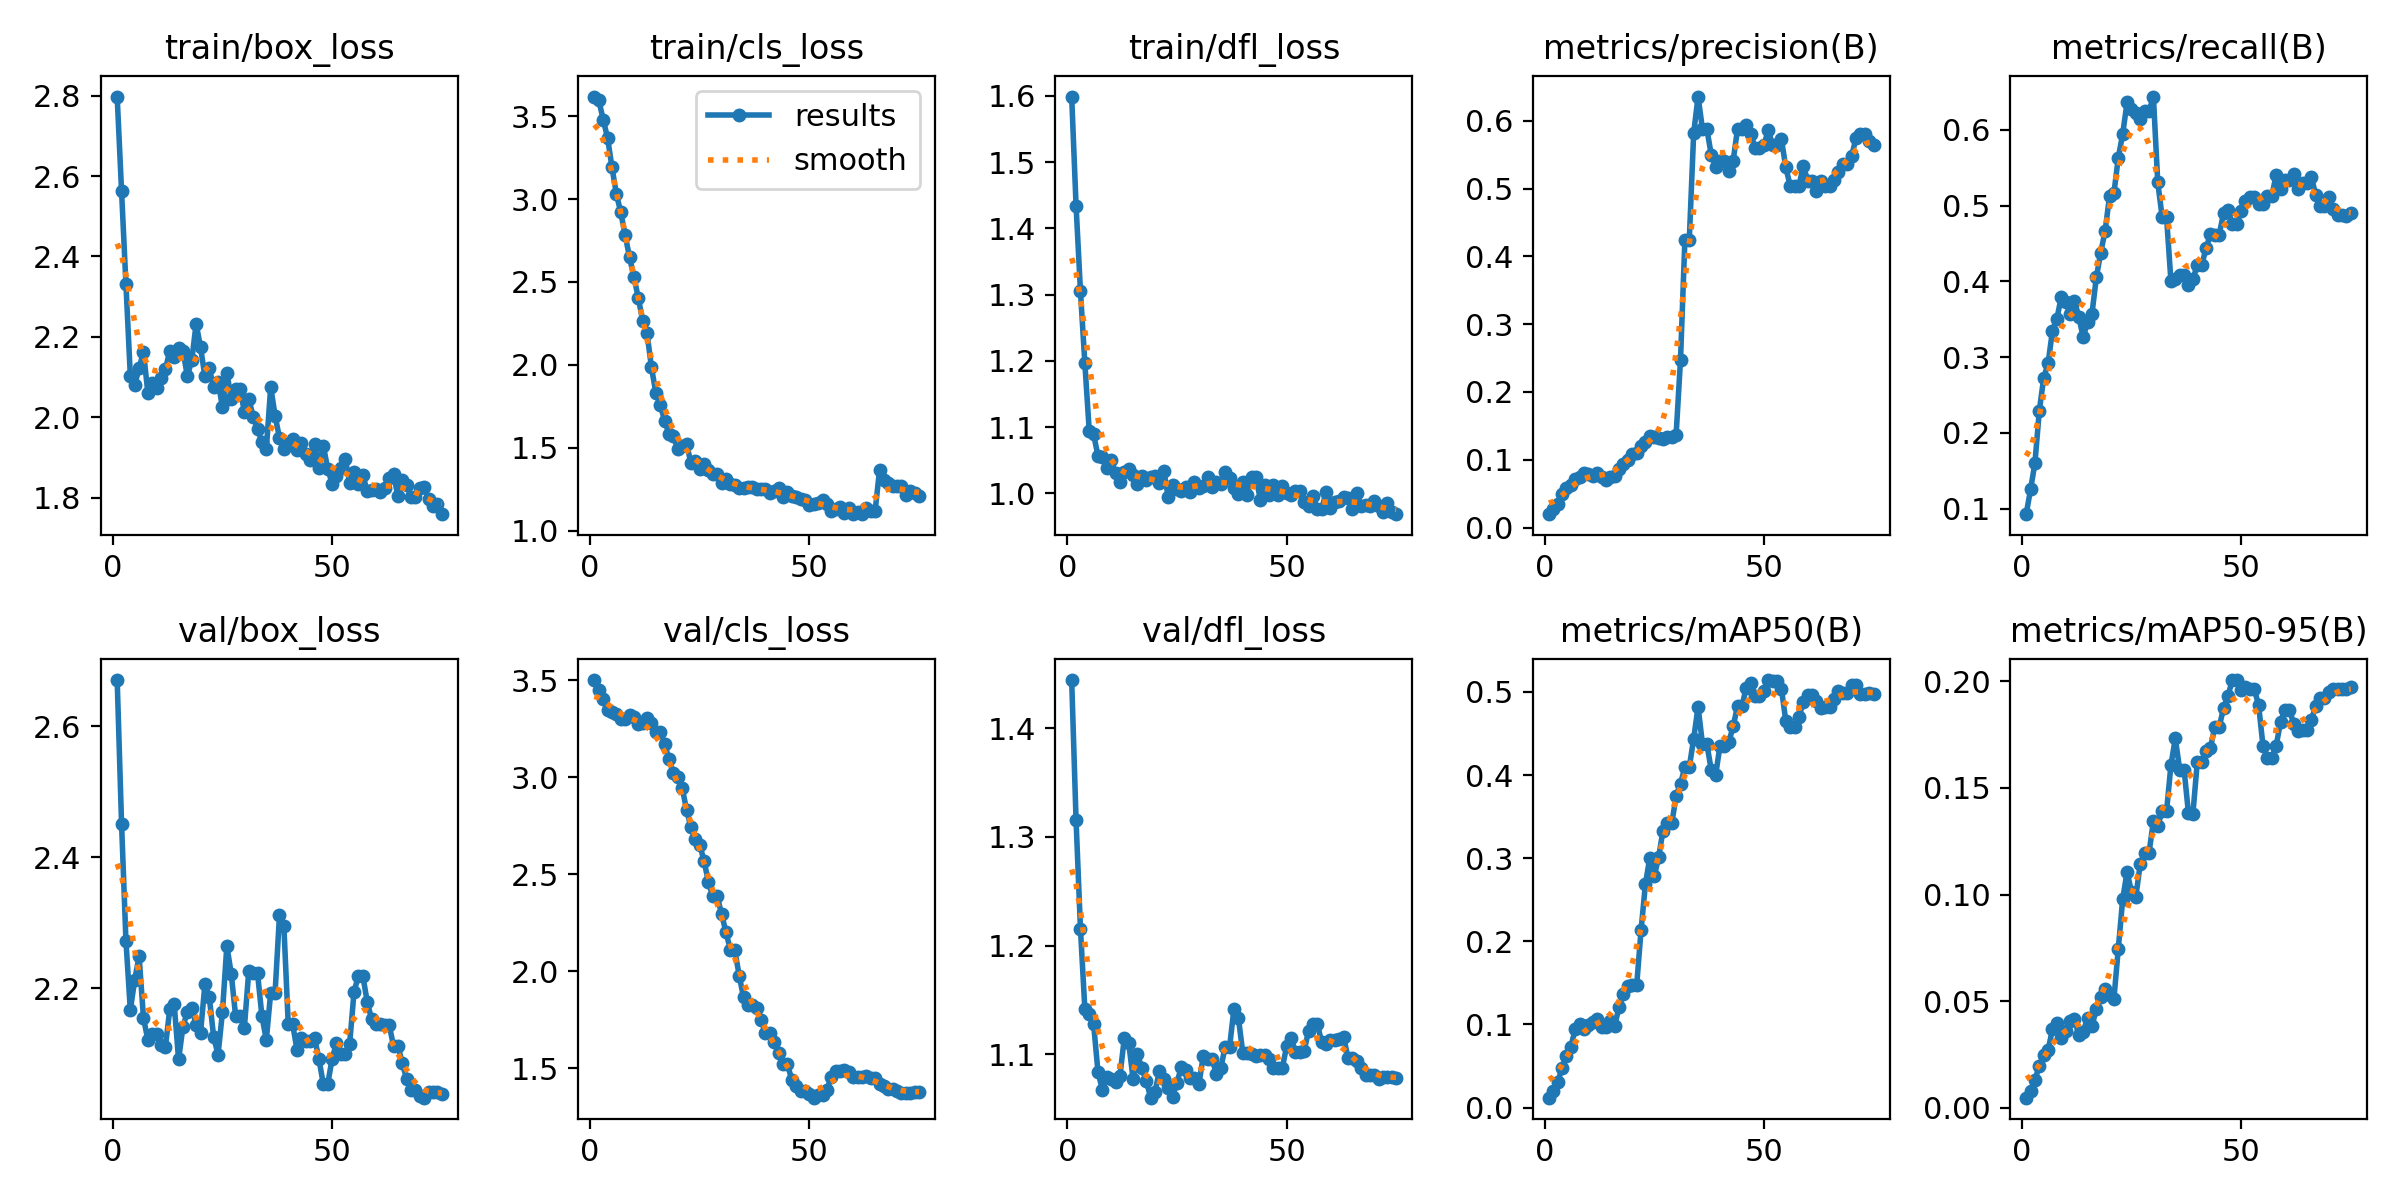

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs
val: Scanning /content/drive/MyDrive/Crater_Detection/data/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:02<00:00,  2.87s/it]
                   all         12        767       0.56      0.477      0.496      0.201
Speed: 6.6ms preprocess, 194.1ms inference, 0.0ms loss, 21.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd /content/drive/MyDrive/Crater_Detection/runs/detect/train/weights
!yolo task=detect mode=predict model=best.pt conf=0.25 source='/content/drive/MyDrive/Crater_Detection/data/train/images/100_jpg.rf.efb4b46e3134cbceabf12a6d540b3cbd.jpg'

/content/drive/MyDrive/Crater_Detection/runs/detect/train/weights
Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs

image 1/1 /content/drive/MyDrive/Crater_Detection/data/train/images/100_jpg.rf.efb4b46e3134cbceabf12a6d540b3cbd.jpg: 384x640 77 Craters, 160.5ms
Speed: 5.3ms preprocess, 160.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict
